In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from datasets import load_dataset

ModuleNotFoundError: No module named 'nltk'

In [5]:
# 1. Загрузка датасета (можно заново, чтобы быть независимыми)
ds = load_dataset("legacy-datasets/banking77")


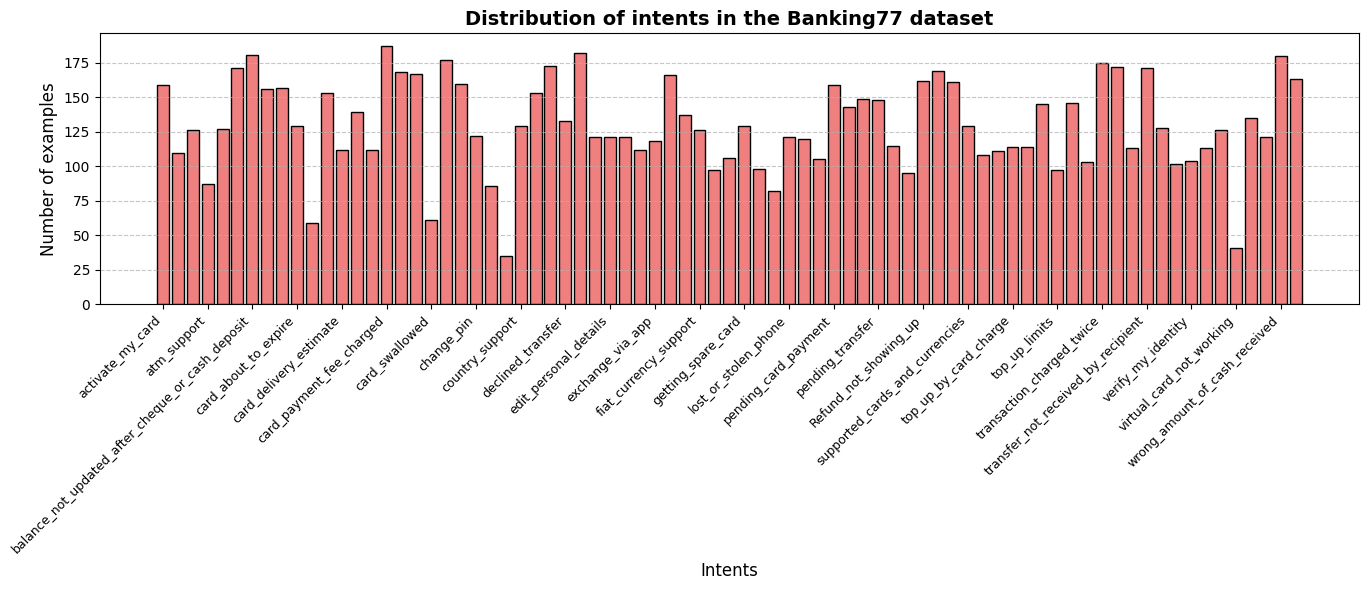

In [14]:

# 2. Извлечение меток
train_labels = ds["train"]["label"]
label_names = ds["train"].features["label"].names

# 3. Подсчёт количества примеров для каждого класса
label_counts = Counter(train_labels)
counts = [label_counts[i] for i in range(len(label_names))]

# 4. Построение графика
plt.figure(figsize=(14, 6))
bars = plt.bar(range(len(label_names)), counts, color='lightcoral', edgecolor='black')

n_labels = len(label_names)
if n_labels > 20:
    step = max(1, n_labels // 20)
    plt.xticks(
        ticks=range(0, n_labels, step),
        labels=[label_names[i] for i in range(0, n_labels, step)],
        rotation=45,
        ha='right',
        fontsize=9
    )
else:
    plt.xticks(
        ticks=range(n_labels),
        labels=label_names,
        rotation=45,
        ha='right',
        fontsize=10
    )

plt.title('Distribution of intents in the Banking77 dataset', fontsize=14, weight='bold')
plt.xlabel('Intents', fontsize=12)
plt.ylabel('Number of examples', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\heart\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\heart\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


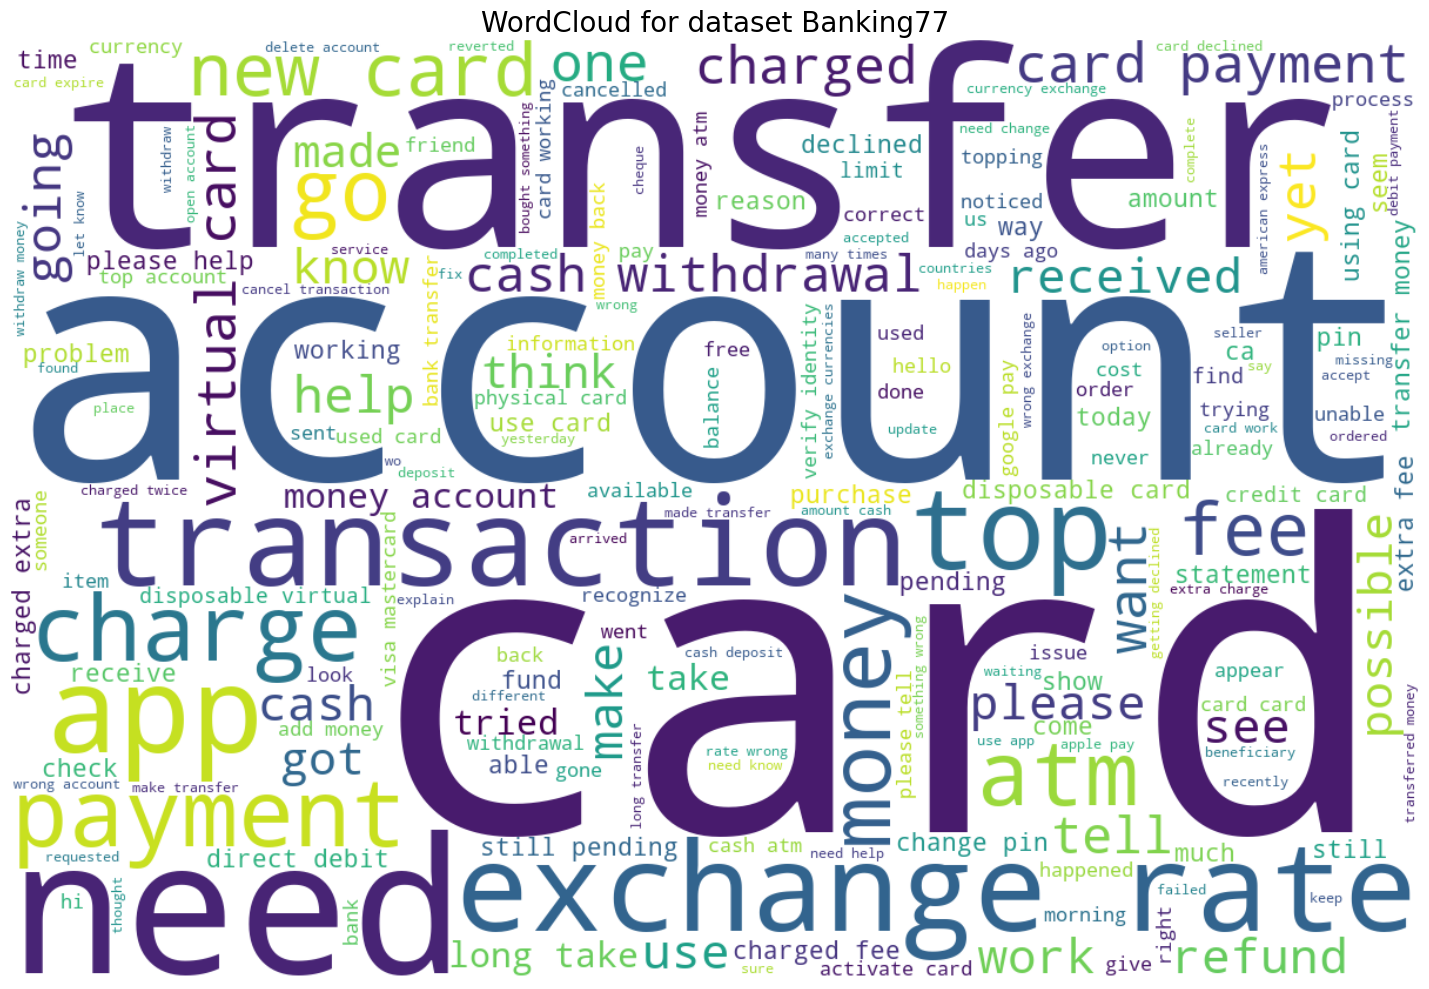

In [15]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from datasets import load_dataset
from wordcloud import WordCloud
import os
# Подгружаем нужные ресурсы NLTK (только один раз)
nltk.download('punkt')
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords')

texts = dataset["train"]["text"]
all_text = " ".join(texts).lower()
tokens = word_tokenize(all_text)

stop_words = set(stopwords.words('english'))
tokens = [
    word for word in tokens
    if word not in stop_words and word not in string.punctuation and word.isalpha()
]

cleaned_text = " ".join(tokens)

wordcloud = WordCloud(
    width=1200,
    height=800,
    background_color='white',
    max_words=200,
    colormap='viridis'
).generate(cleaned_text)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud for dataset Banking77", fontsize=20)
plt.tight_layout()

plt.show()

